Superdense Coding Measurement Results: {'10': 1024}


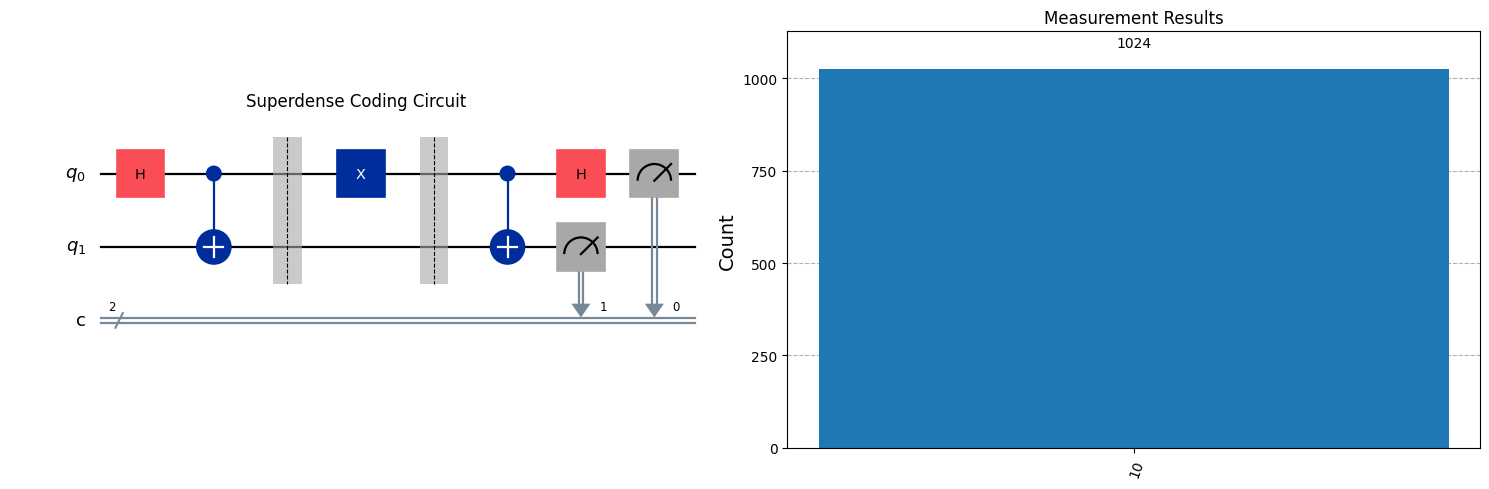

In [1]:
# Superdense Coding Protocol - Updated for Qiskit 2024+
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Step 1: Create a 2-qubit circuit (Alice: q0, Bob: q1)
qc = QuantumCircuit(2, 2)

# Step 2: Create entanglement
qc.h(0)
qc.cx(0, 1)
qc.barrier()

# Step 3: Alice encodes two classical bits (let's say 10)
qc.x(0)  # Bit flip for 1
# qc.z(0) # Phase flip for second bit (optional for 11, can uncomment to test)
qc.barrier()

# Step 4: Alice sends q0 to Bob — he now has both qubits

# Step 5: Bob decodes
qc.cx(0, 1)
qc.h(0)
qc.measure([0, 1], [0, 1])

# Step 6: Simulate
sim = Aer.get_backend('aer_simulator')
job = sim.run(qc)
result = job.result()
counts = result.get_counts()

# Step 7: Show results
print("Superdense Coding Measurement Results:", counts)

# Improved visualization
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Draw circuit
qc.draw('mpl', ax=ax1)
ax1.set_title('Superdense Coding Circuit')

# Plot measurement results
plot_histogram(counts, ax=ax2)
ax2.set_title('Measurement Results')

plt.tight_layout()
plt.show()

Superdense Coding Measurement Results: {'01': 1024}


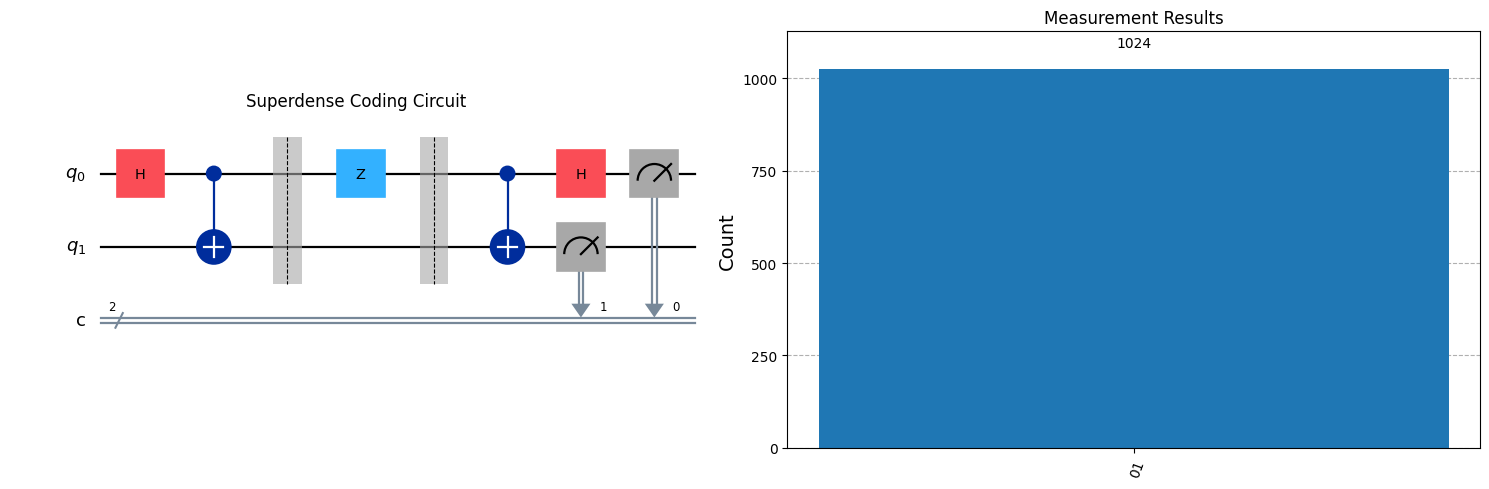

In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Quantum Circuit: 2 qubits, 2 classical bits
qc = QuantumCircuit(2, 2)

# Step 1: Create entanglement
qc.h(0)
qc.cx(0, 1)
qc.barrier()

# Step 2: Alice encodes 2-bit message "10"
qc.z(0)  # Z gate for second bit 1
qc.barrier()

# Step 3: Bob decodes
qc.cx(0, 1)
qc.h(0)
qc.measure([0, 1], [0, 1])

# Step 4: Simulation
sim = AerSimulator()
job = sim.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

# Step 5: Display results
print("Superdense Coding Measurement Results:", counts)

# Visualization
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
qc.draw('mpl', ax=ax1)
ax1.set_title('Superdense Coding Circuit')
plot_histogram(counts, ax=ax2)
ax2.set_title('Measurement Results')
plt.tight_layout()
plt.show()


Message 00 measurement results: {'00': 1024}
Message 01 measurement results: {'10': 1024}
Message 10 measurement results: {'01': 1024}
Message 11 measurement results: {'11': 1024}


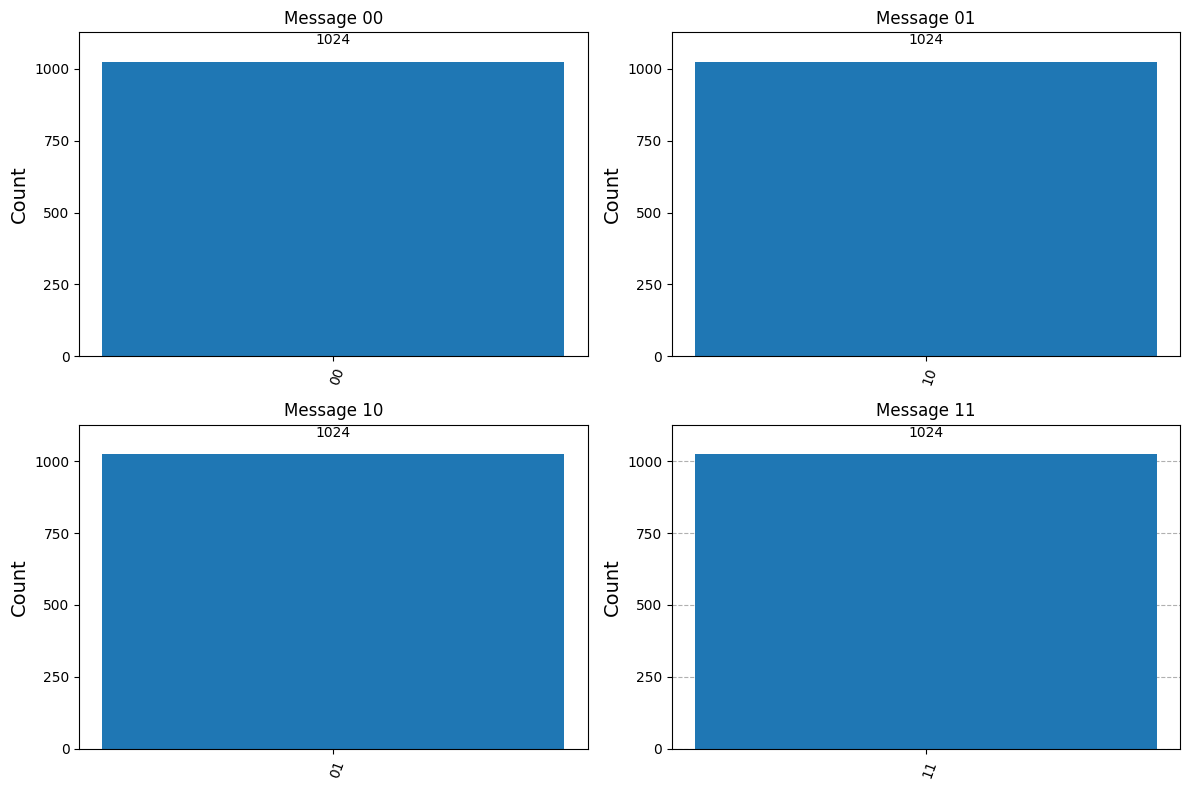

In [3]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Simulator
sim = AerSimulator(shots=1024)

# Dictionary to store results
all_counts = {}

# Mapping: classical bits -> gates
messages = {
    "00": [],
    "01": ["X"],
    "10": ["Z"],
    "11": ["X", "Z"]
}

# Run circuit for each 2-bit message
for msg, gates in messages.items():
    # Step 1: Create circuit (2 qubits, 2 classical bits)
    qc = QuantumCircuit(2, 2)
    
    # Step 2: Create entanglement
    qc.h(0)
    qc.cx(0, 1)
    
    # Step 3: Alice encodes the message
    for gate in gates:
        if gate == "X":
            qc.x(0)
        elif gate == "Z":
            qc.z(0)
    
    # Step 4: Bob decodes
    qc.cx(0, 1)
    qc.h(0)
    
    # Step 5: Measurement
    qc.measure([0, 1], [0, 1])
    
    # Step 6: Run simulation
    job = sim.run(qc)
    result = job.result()
    counts = result.get_counts()
    all_counts[msg] = counts

# Step 7: Display results
for msg, counts in all_counts.items():
    print(f"Message {msg} measurement results: {counts}")

# Step 8: Plot histograms side by side
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, (msg, counts) in enumerate(all_counts.items()):
    plot_histogram(counts, ax=axes[i])
    axes[i].set_title(f'Message {msg}')

plt.tight_layout()
plt.show()
